<a href="https://colab.research.google.com/github/ammad19/AI-course-exercises/blob/master/MNISTCh2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [3]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 19s 10ms/step - loss: 0.4209 - accuracy: 0.8772
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1109 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0693 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0475 - accuracy: 0.9864
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0379 - accuracy: 0.9889


In [20]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = network.fit(partial_x_train,partial_y_train,epochs=15,batch_size=128,validation_data=(x_val, y_val))

Epoch 1/15
391/391 [==============================] - 5s 11ms/step - loss: 0.0082 - accuracy: 0.9979 - val_loss: 0.0402 - val_accuracy: 0.9875
Epoch 2/15
391/391 [==============================] - 4s 11ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0402 - val_accuracy: 0.9888
Epoch 3/15
391/391 [==============================] - 4s 11ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0415 - val_accuracy: 0.9889
Epoch 4/15
391/391 [==============================] - 4s 11ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0481 - val_accuracy: 0.9873
Epoch 5/15
391/391 [==============================] - 4s 11ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0469 - val_accuracy: 0.9886
Epoch 6/15
391/391 [==============================] - 4s 11ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0503 - val_accuracy: 0.9882
Epoch 7/15
391/391 [==============================] - 4s 11ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0531 - val_accuracy: 0.9877

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

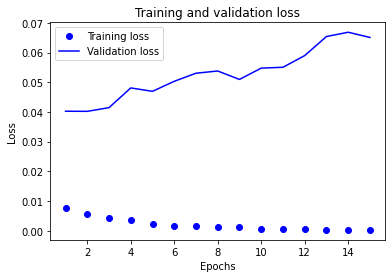

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

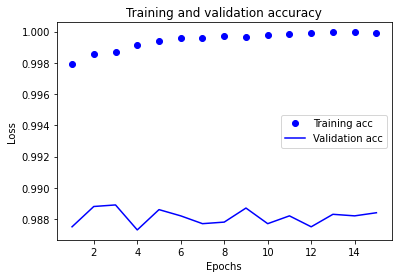

In [23]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.9808
test_acc: 0.9807999730110168
